In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [3]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [4]:

corr_matrix = df.corr()
diabetes_corr = corr_matrix['Diabetes_binary']
diabetes_corr_list = diabetes_corr.tolist()
#print(diabetes_corr_list)

copy = df.copy()

for column in copy.columns:
    over_threshold = 0
    algne_korrelatsioon = df[[column, 'Diabetes_binary']].corr().abs().iloc[0, 1]
    x = 1
    for _ in range(x):
        np.random.shuffle(copy[column].values)
        correlation = copy[[column, 'Diabetes_binary']].corr().abs().iloc[0, 1]
        #print(f'Korrelatsioon veeru {column} ja Diabetes_binary vahel: {correlation}')
        if correlation > algne_korrelatsioon:
            print("leitud")
            over_threshold += 1
    if (x * 0.05) < over_threshold: # veerud, mida droppida tahame
        print(column)
            
        

## Visualising the data

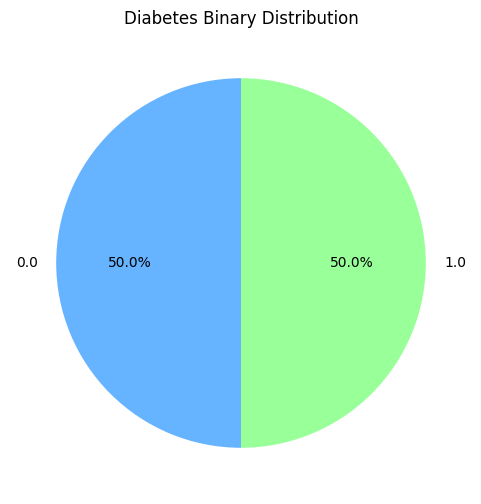

In [5]:
diabetes_counts = df['Diabetes_binary'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Diabetes Binary Distribution')
plt.show()

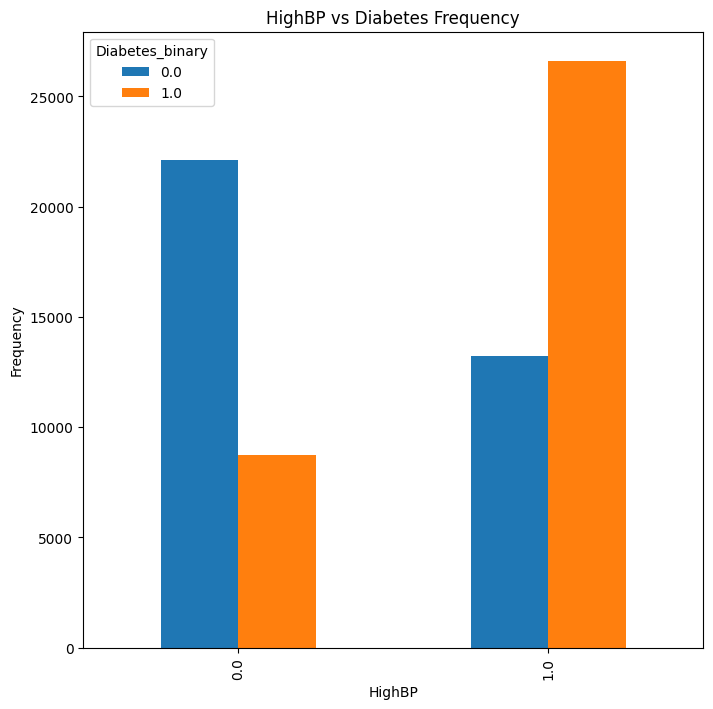

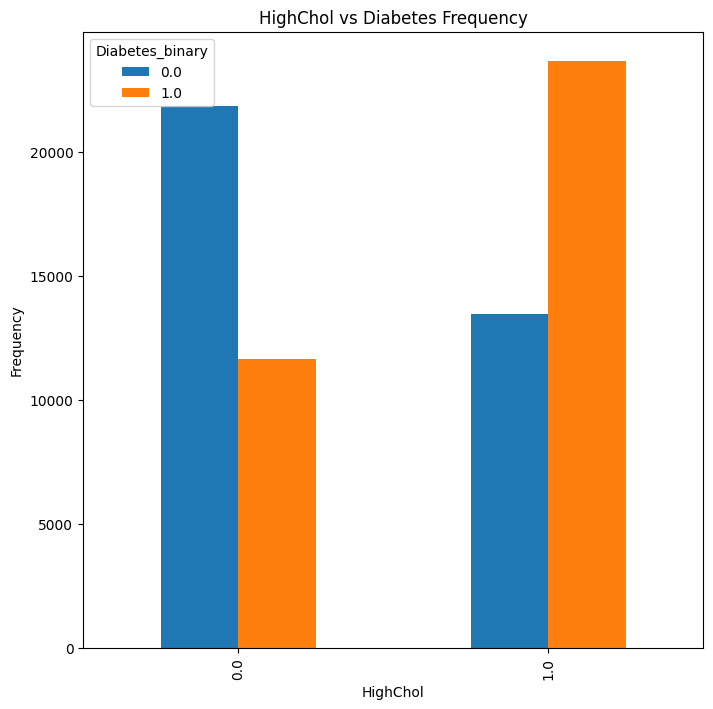

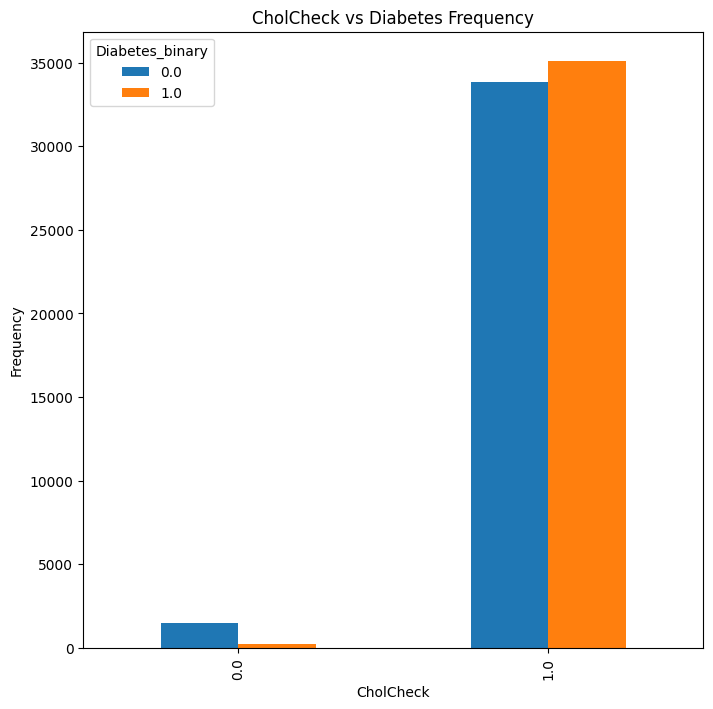

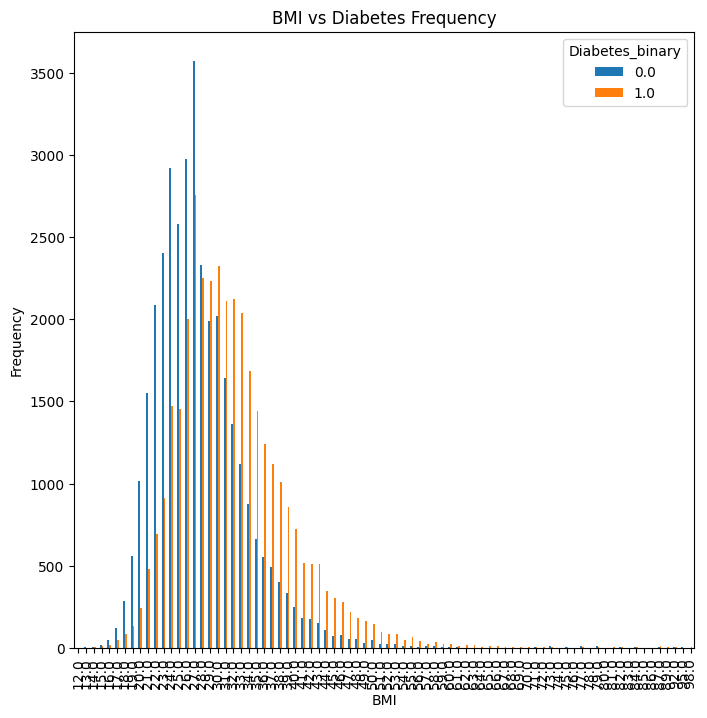

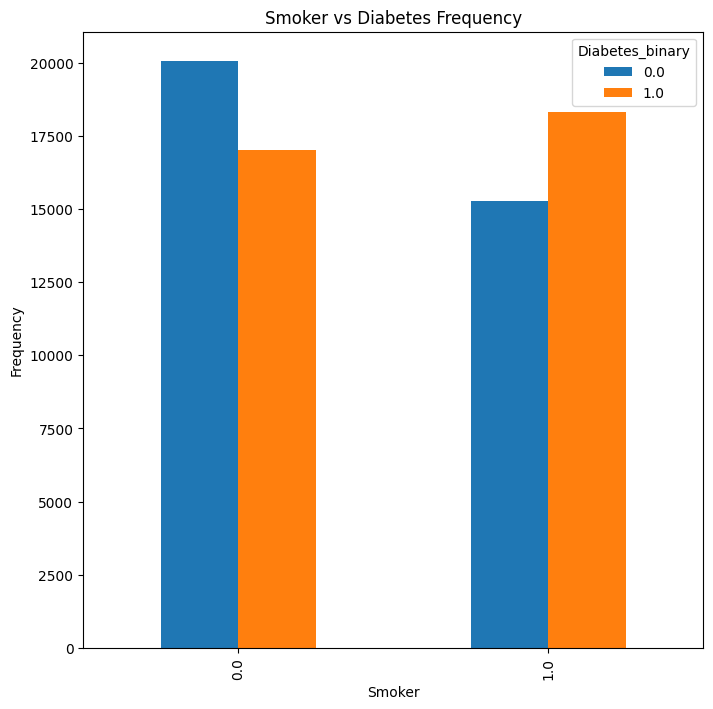

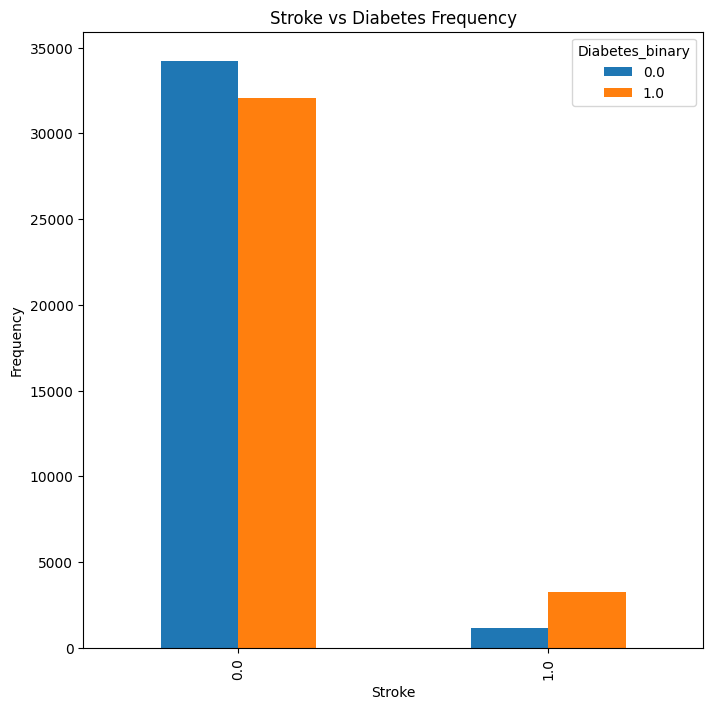

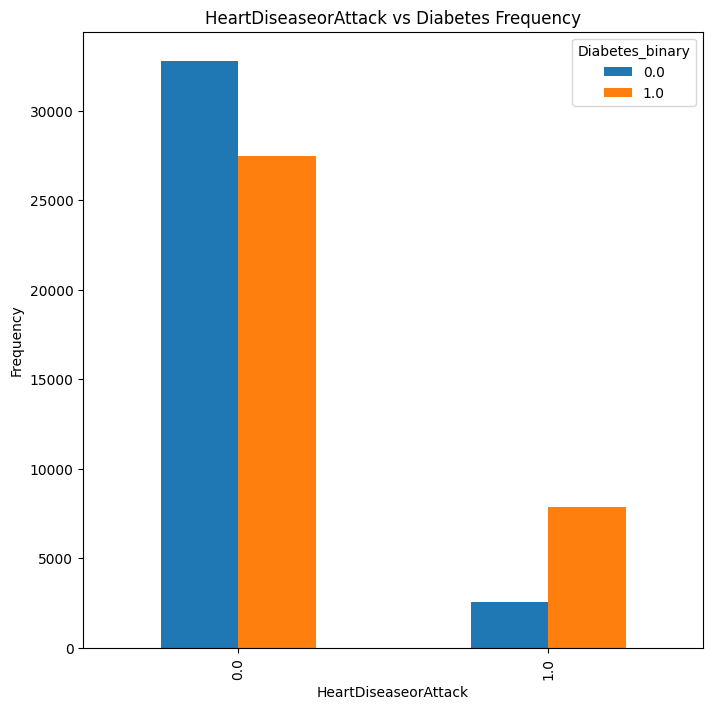

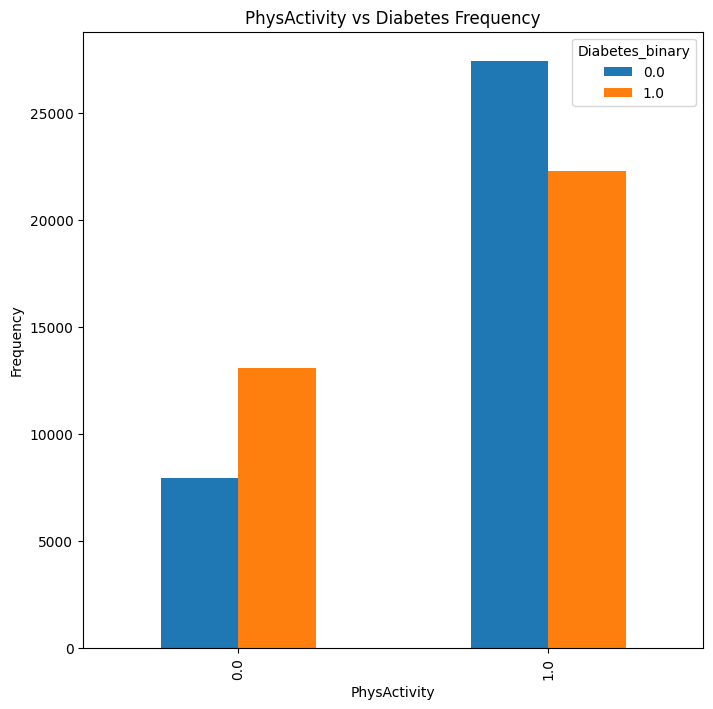

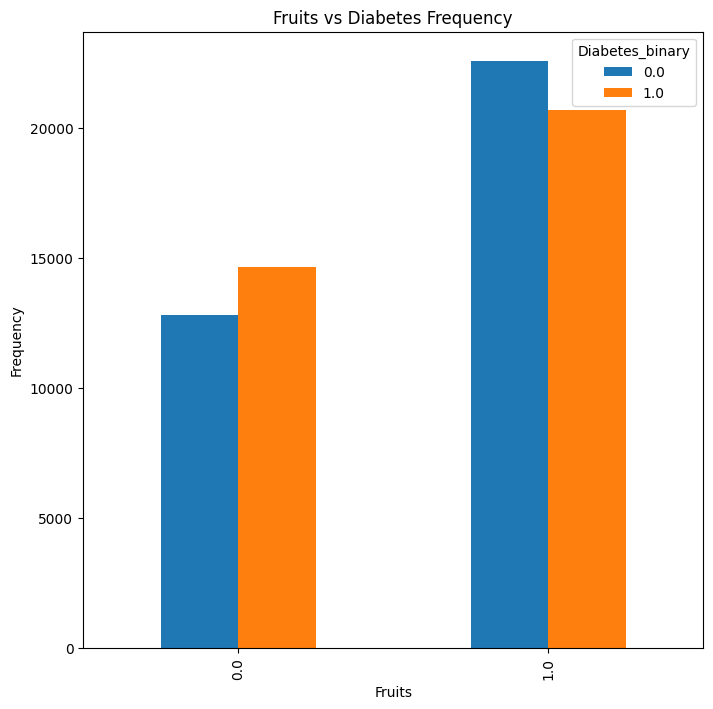

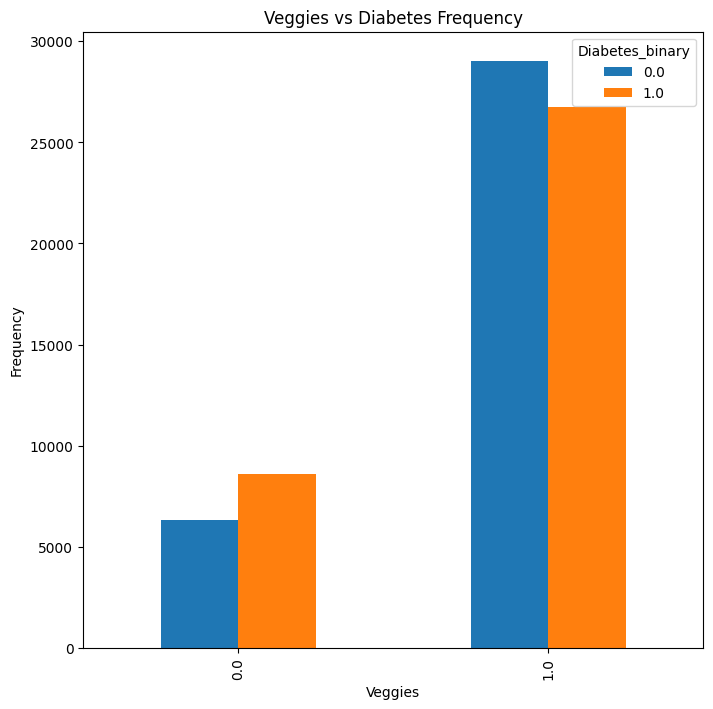

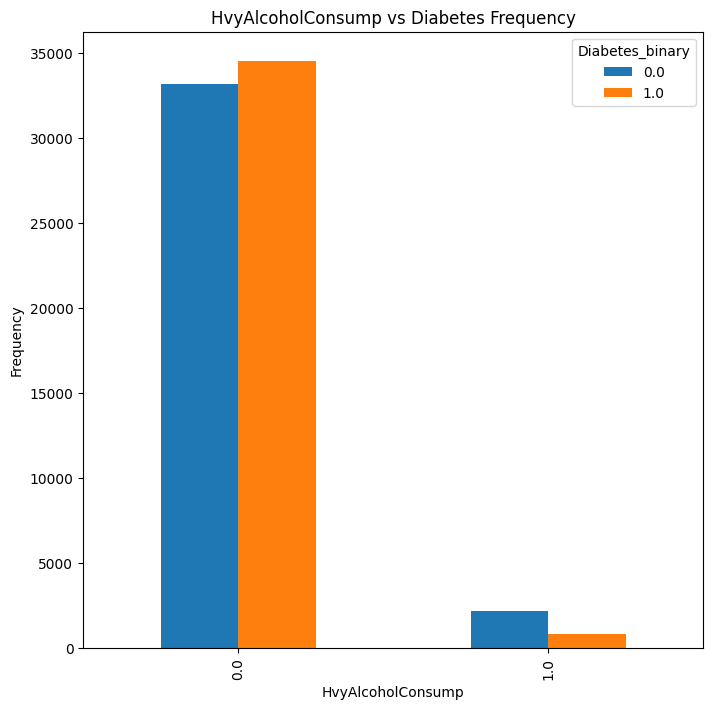

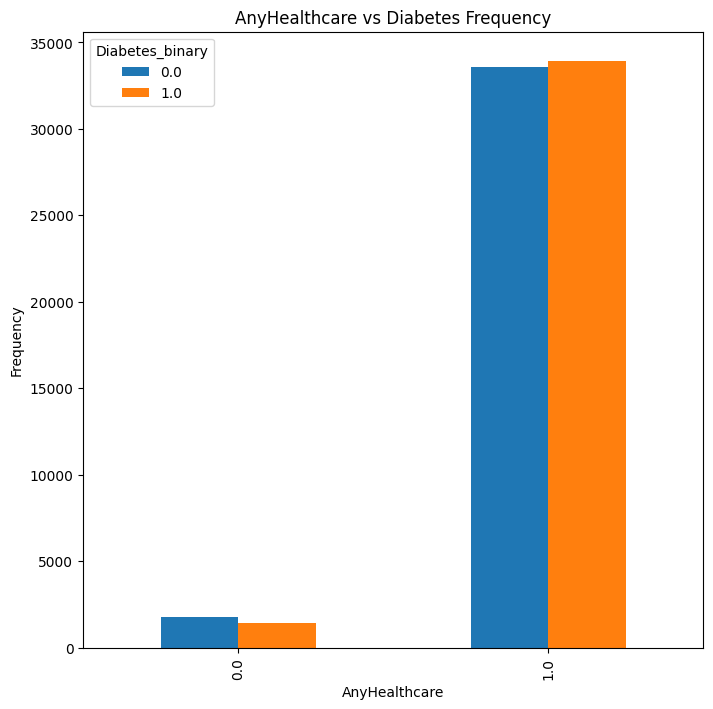

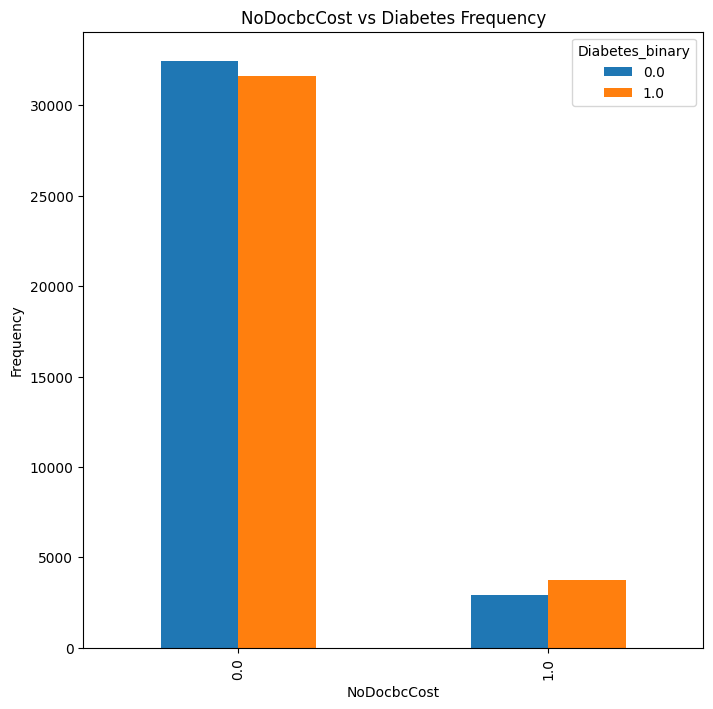

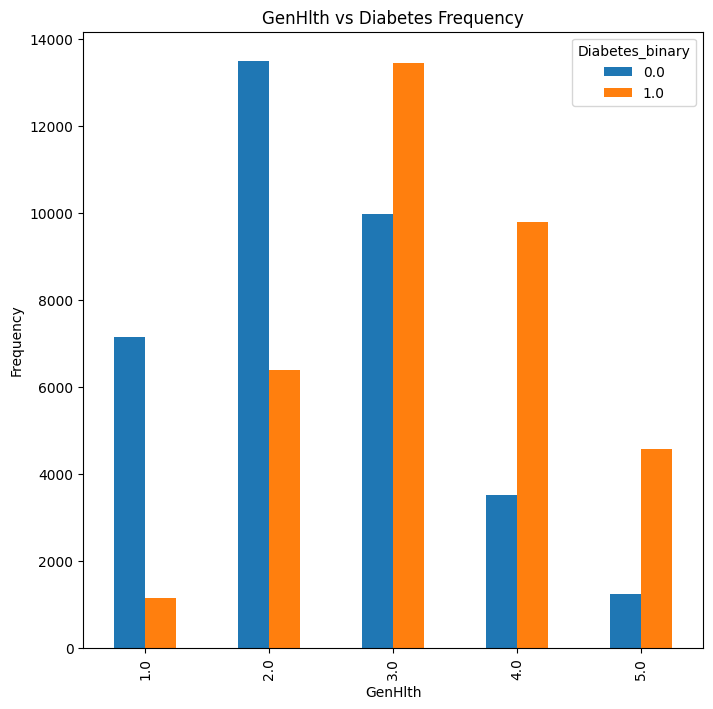

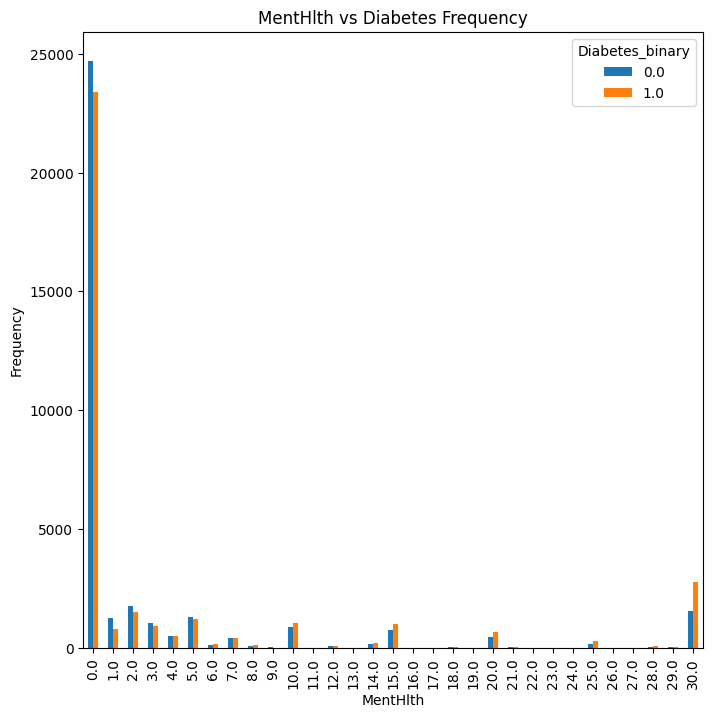

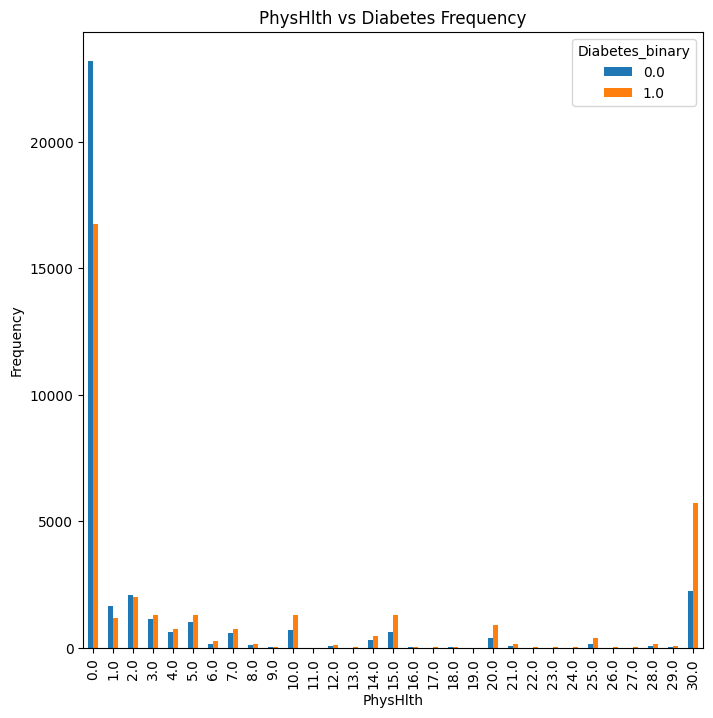

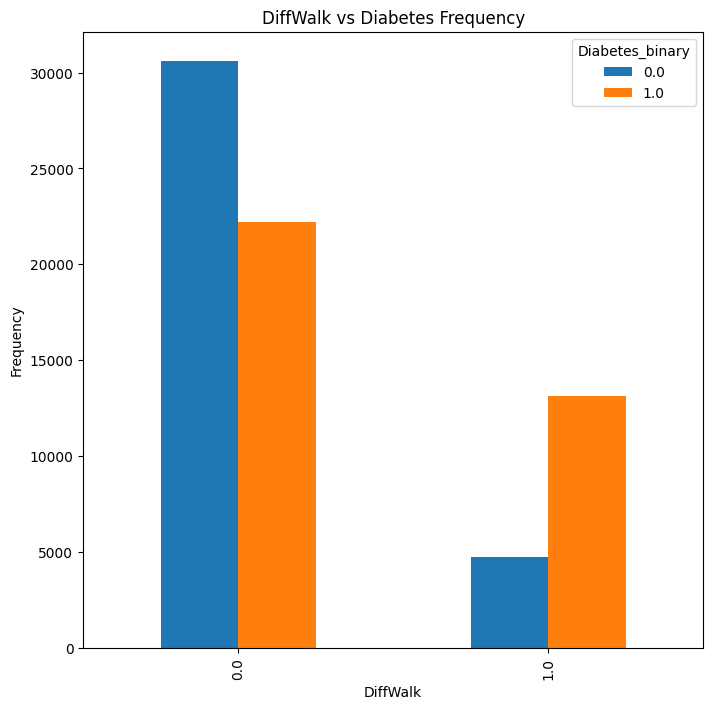

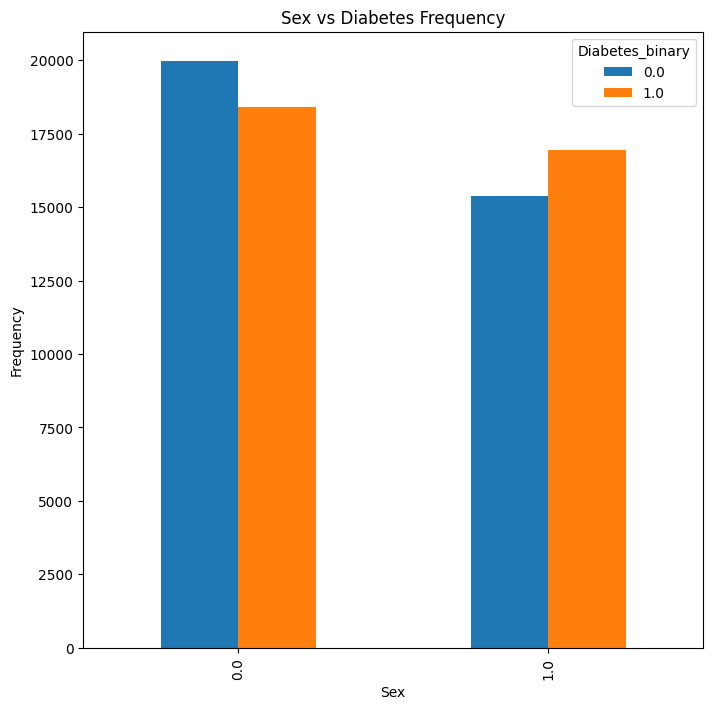

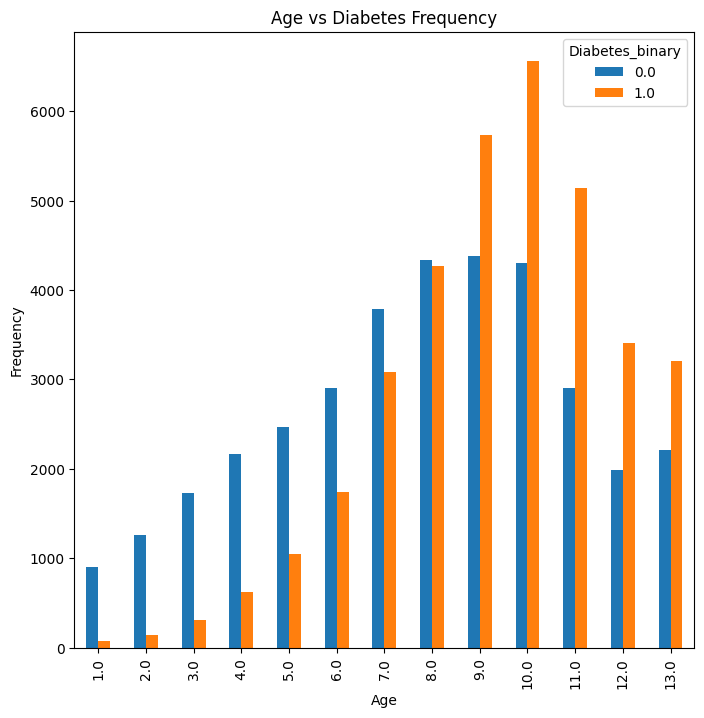

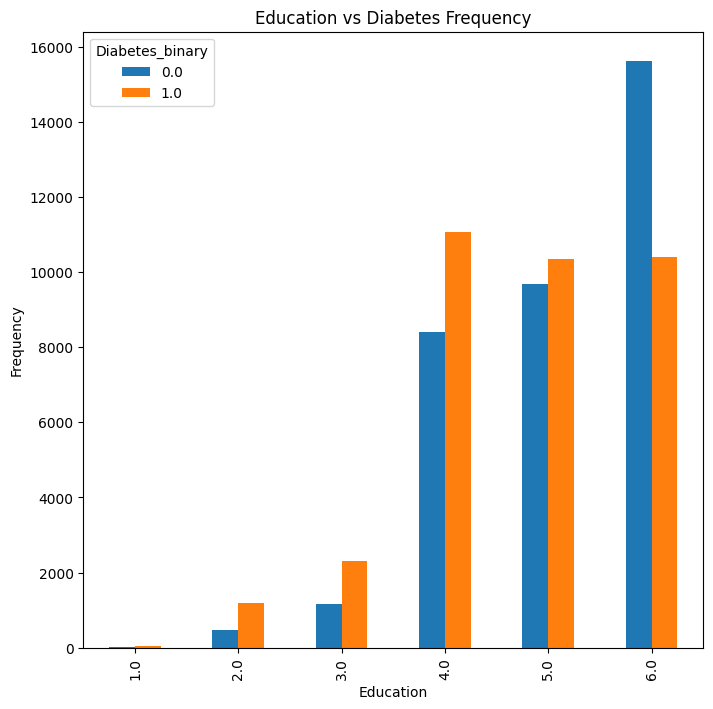

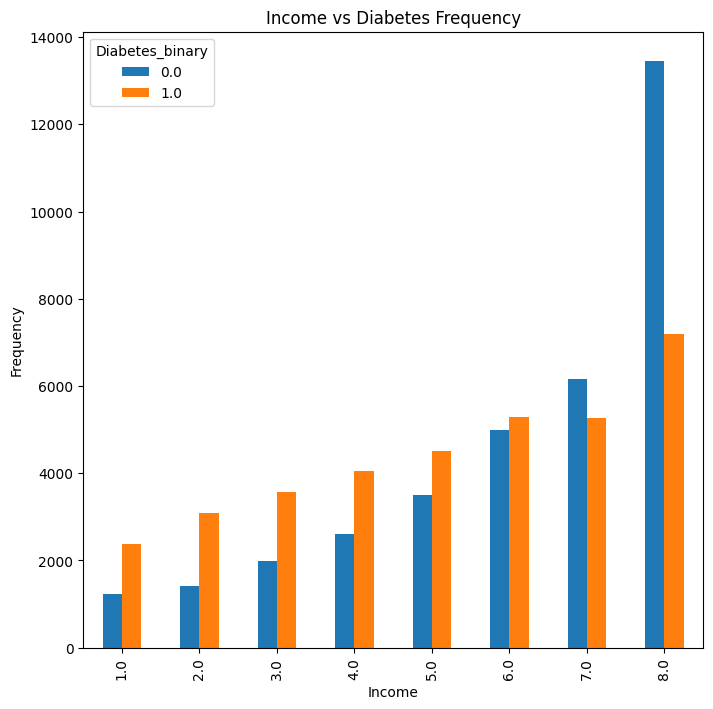

In [6]:
for column in df.columns[1:]:
    
    crosstab = pd.crosstab(df[column], df['Diabetes_binary'])
    crosstab.plot(kind="bar", figsize=(8,8))
    plt.title(f'{column} vs Diabetes Frequency')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Splitting the train and test data

In [7]:
from sklearn.model_selection import train_test_split 

X_train = df.drop(columns=['Diabetes_binary'])
y_train = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 5)

## Trying different feature selection techniques


Irrelevant or partially relevant features can negatively impact model performance. 

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

### Unvariate selection

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10) 
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')


### Feature importance 

[0.0870141  0.04706214 0.00707556 0.16086397 0.02548427 0.0104892
 0.02218768 0.02099352 0.0269327  0.02164892 0.00952492 0.00848963
 0.01354533 0.09258676 0.05617451 0.073625   0.03164538 0.02270412
 0.1193497  0.06126399 0.08133858]


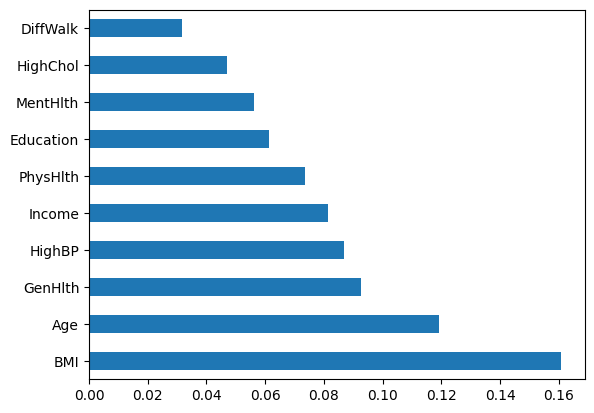

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier().fit(X_train, y_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Correlation Matrix with Heatmap

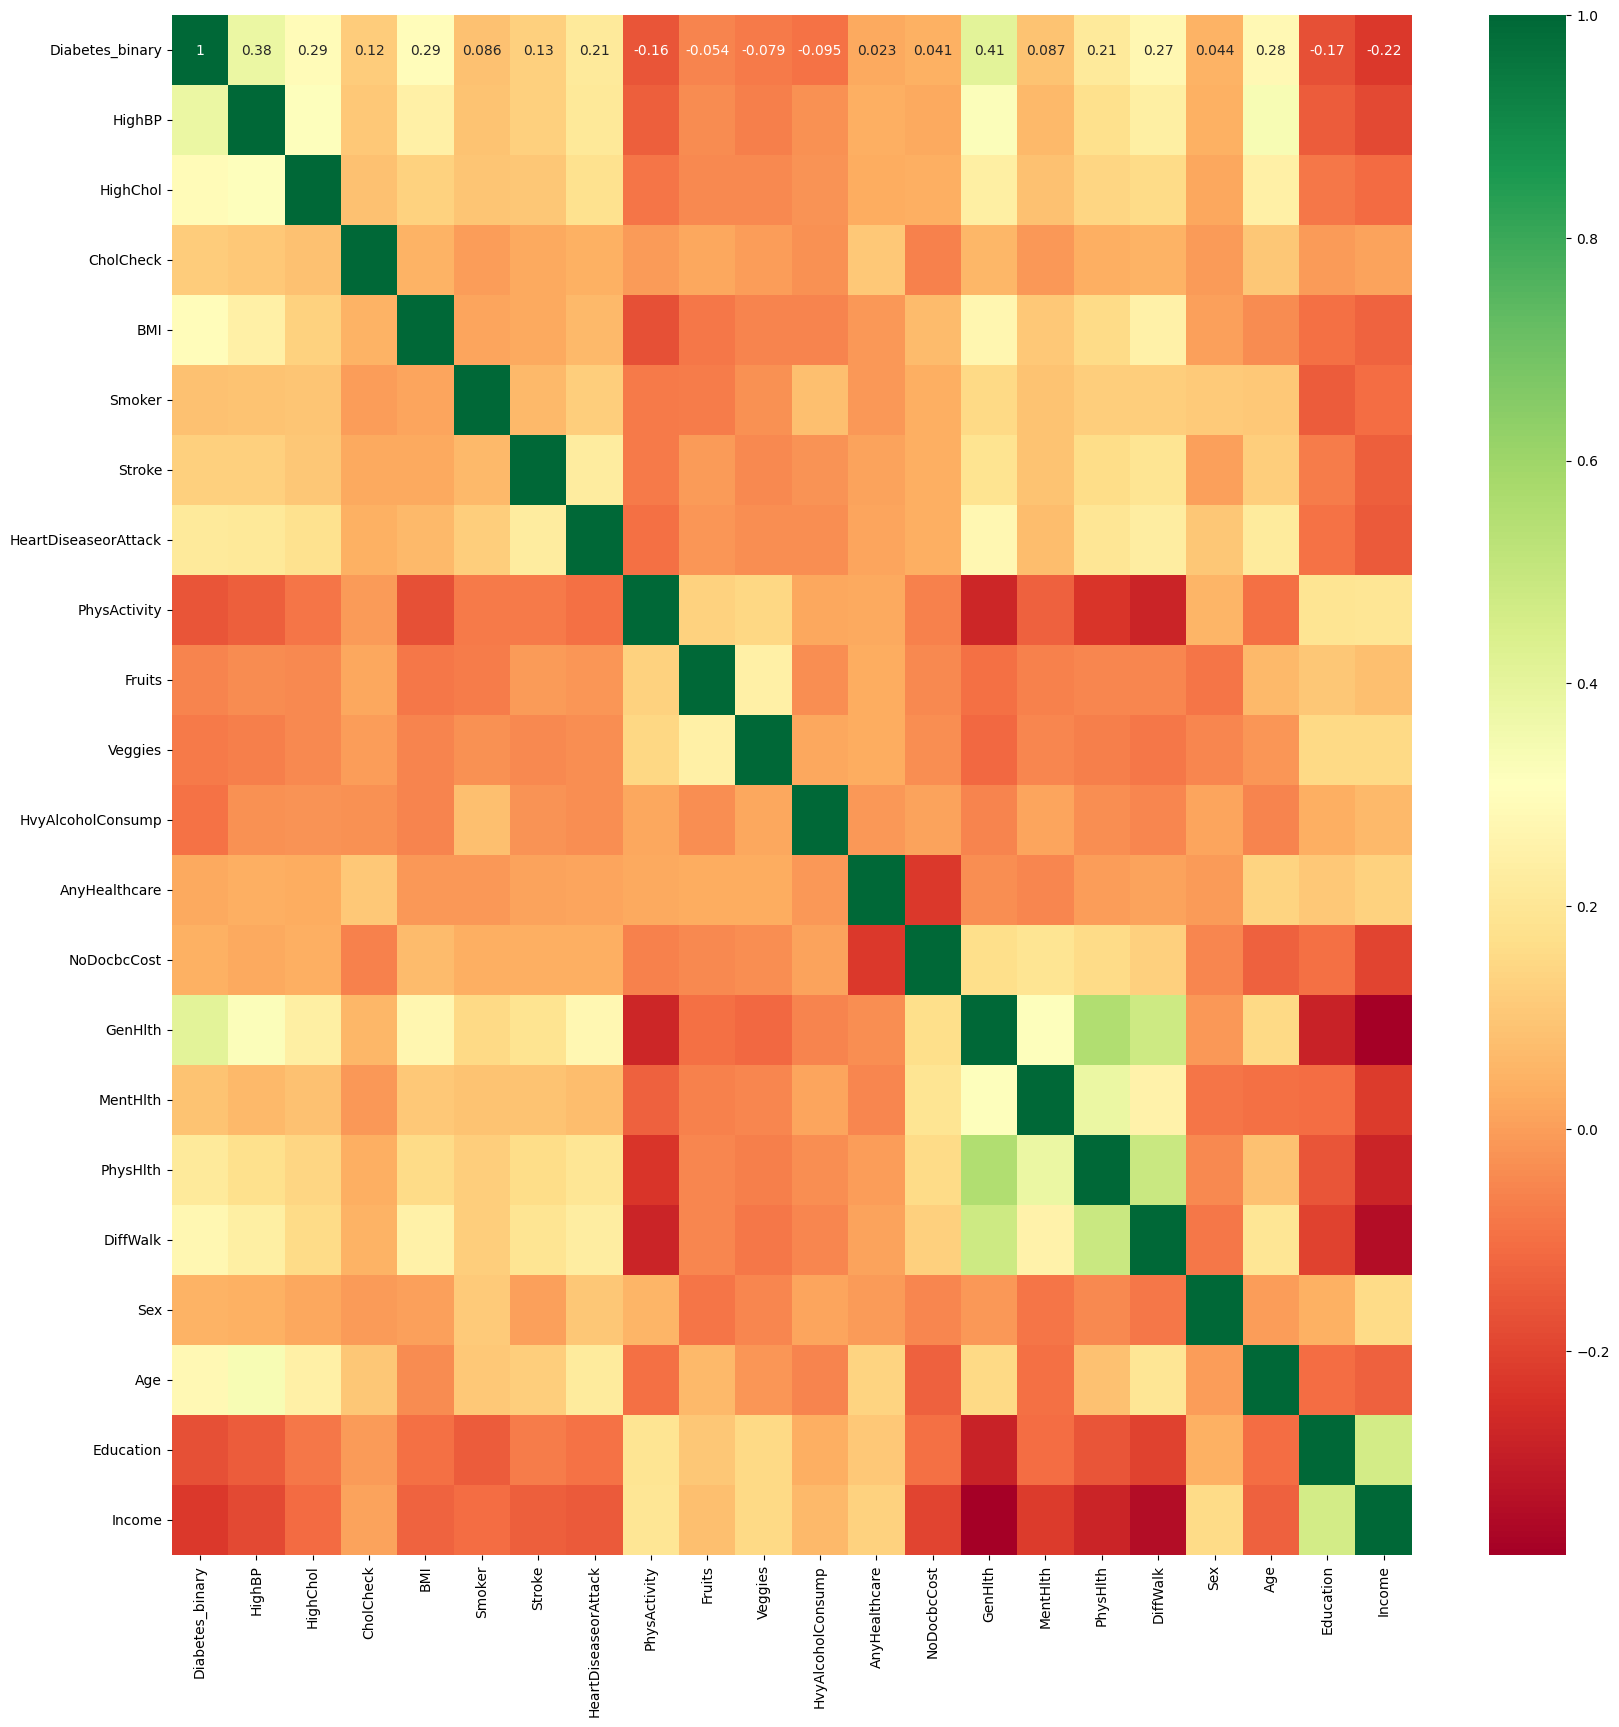

In [10]:
import seaborn as sns 

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Recursive feature elimination

In [11]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

rfe = RFE(model, n_features_to_select=5)  

X_train_selected = rfe.fit_transform(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)


Selected features: Index(['BMI', 'GenHlth', 'PhysHlth', 'Age', 'Income'], dtype='object')


<Axes: >

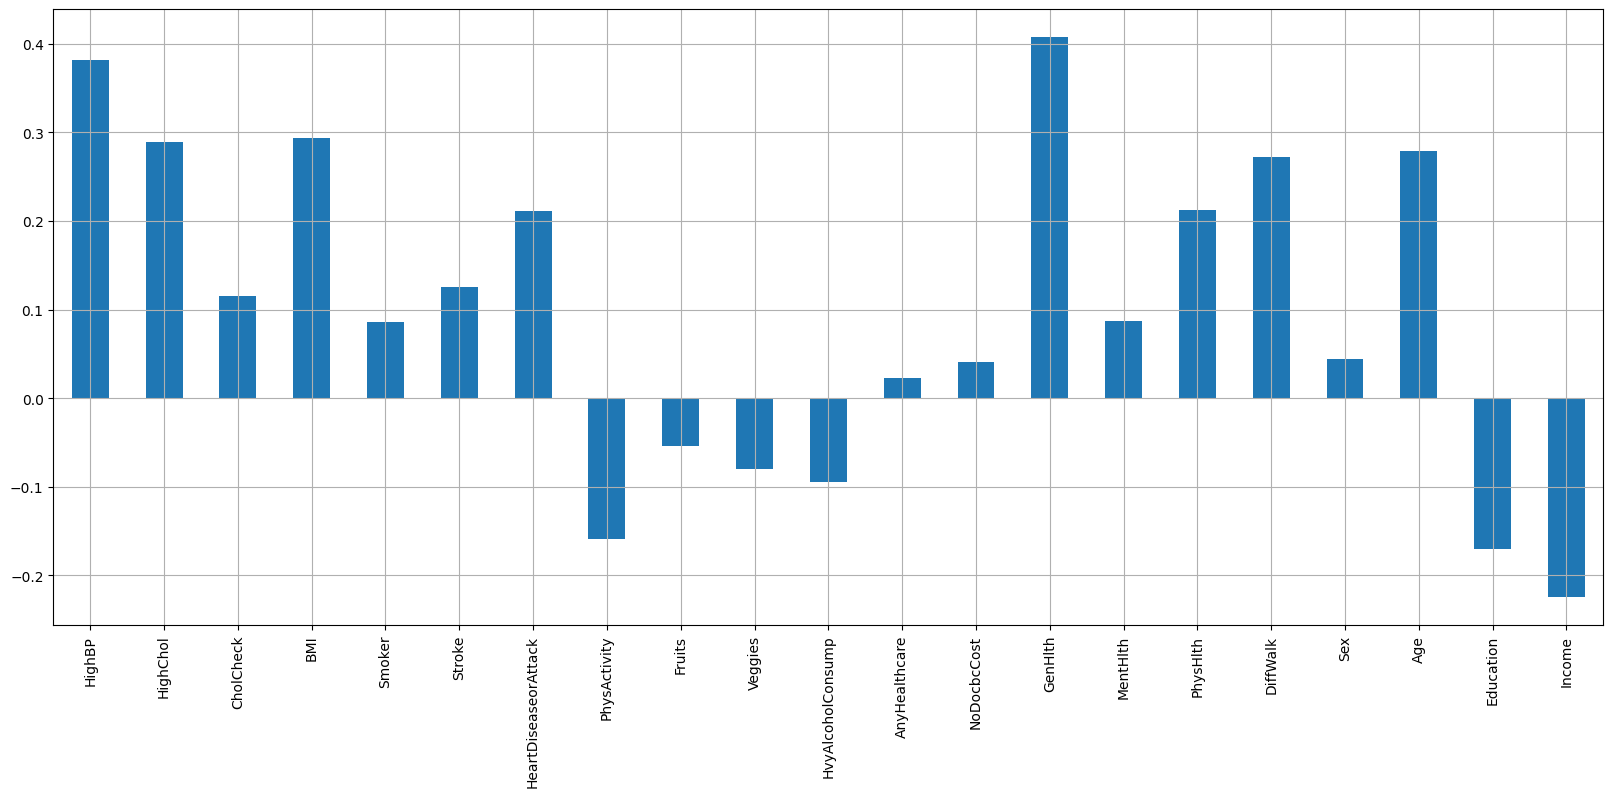

In [12]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8))

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

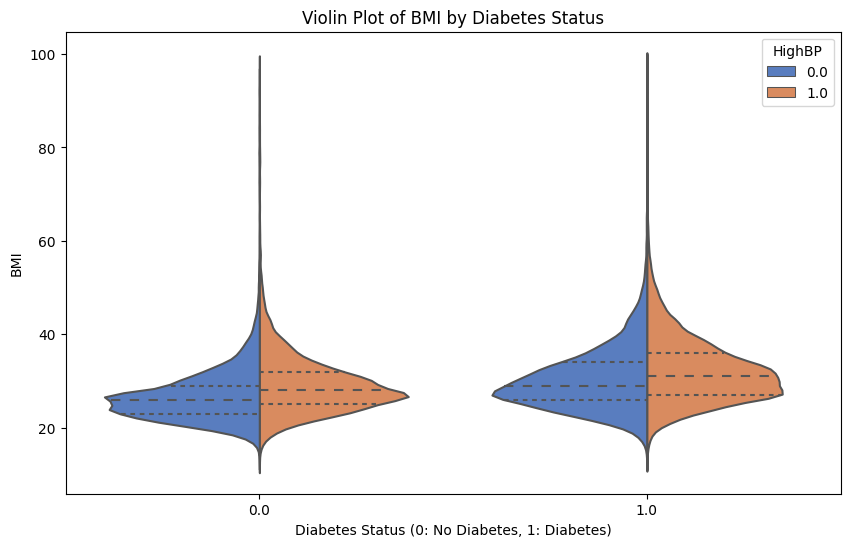

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

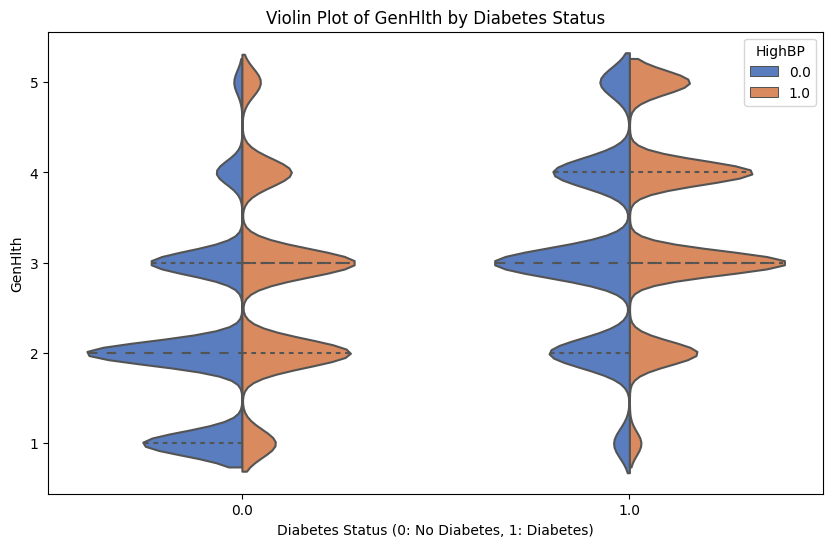

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

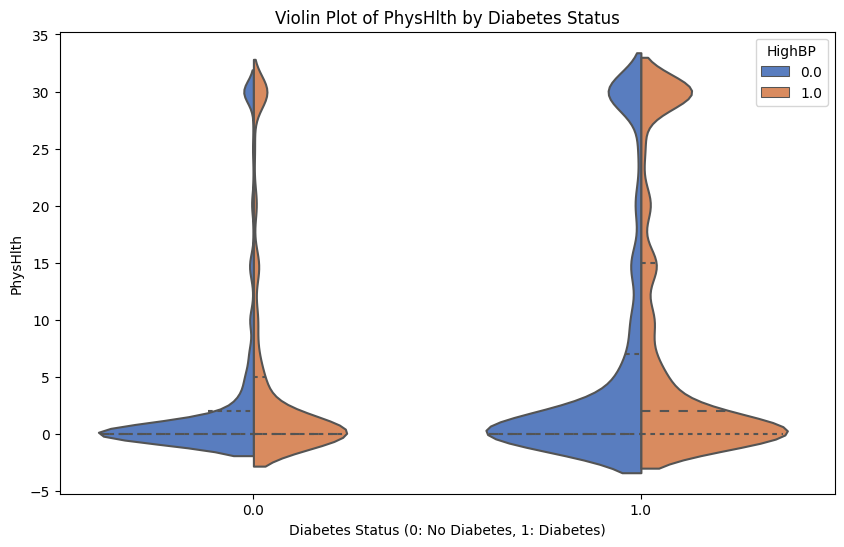

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

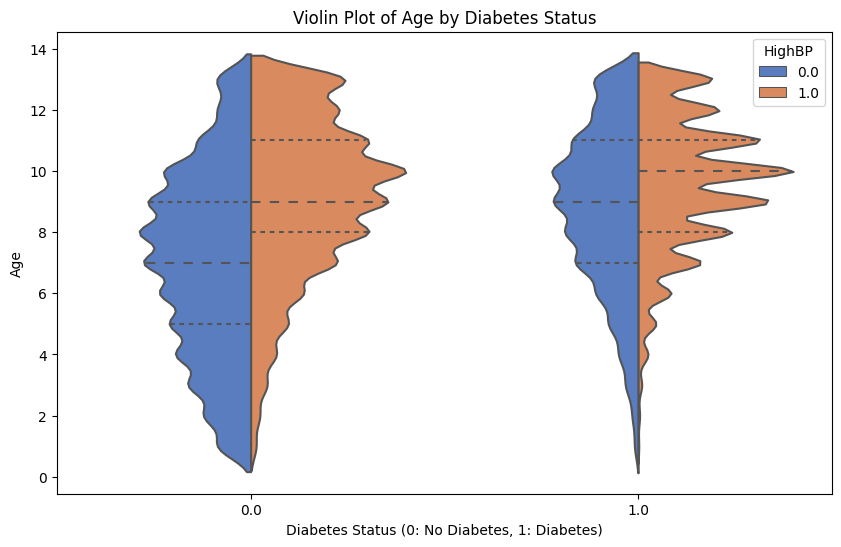

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

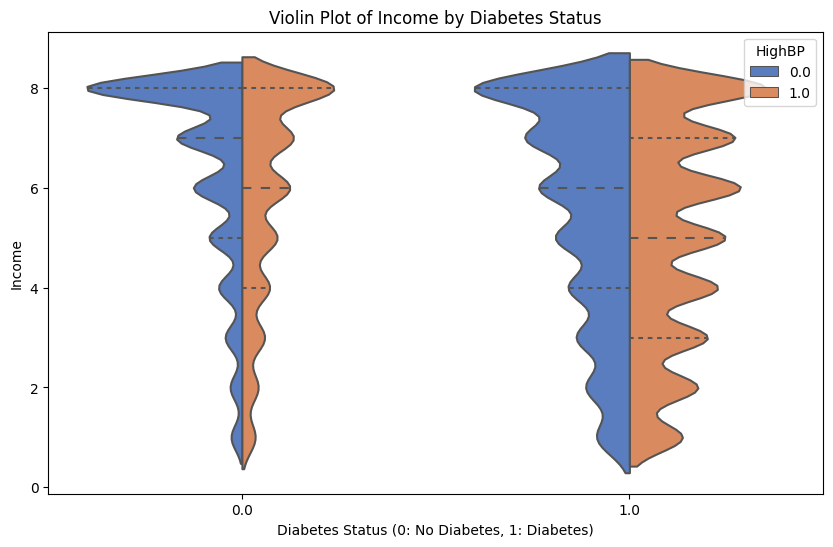

In [46]:
# võibolla huvitavad plotid
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Diabetes_binary', y=feature, data=df, hue='HighBP', split=True, inner='quartile', palette='muted')
    plt.title('Violin Plot of '+feature+' by Diabetes Status')
    plt.xlabel('Diabetes Status (0: No Diabetes, 1: Diabetes)')
    plt.ylabel(feature)
    plt.show()

In [13]:
# nii saaksime võrrelda, kas kahe tunnuse vahel on seos, aga ma ei tea,
# kui õigesti see praegu töötab

from scipy.stats import spearmanr

correlation, p_value = spearmanr(df['Diabetes_binary'], df['Age'])

print(f"Spearmani korrelatsioonikordaja: {correlation}")
print(f"P-väärtus: {p_value}")


Spearmani korrelatsioonikordaja: 0.26161995737057975
P-väärtus: 0.0


## Model building and evalution

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
from math import sqrt

logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)

lr_pred = logistic_regression.predict(X_test)
print(f'LogisticRegression Score: {accuracy_score(y_test, lr_pred)}')


LogisticRegression Score: 0.744536388712073


C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
mse = mean_squared_error(y_test, lr_pred)
rmse = sqrt(mean_squared_error(y_test, lr_pred))
precision = precision_score(y_test, lr_pred)
recall = recall_score(y_test, lr_pred)
f1_score_result = f1_score(y_test, lr_pred)

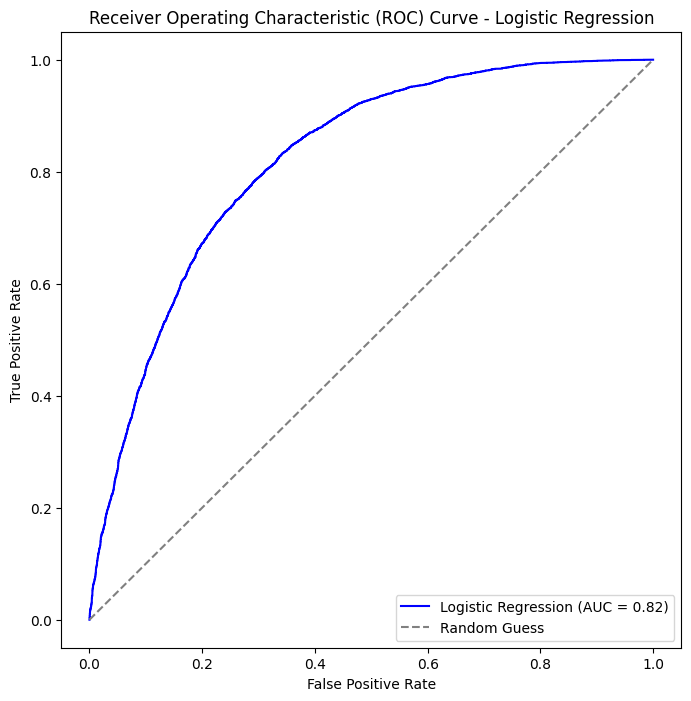

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

lr_probs = logistic_regression.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='blue')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
random_forest.fit(X_train, y_train)

rfc_pred = random_forest.predict(X_test)
print(f'RandomForestClassifier Score: {accuracy_score(y_test, rfc_pred)}')

RandomForestClassifier Score: 0.752528467359785


auc - 0.8293317591000474


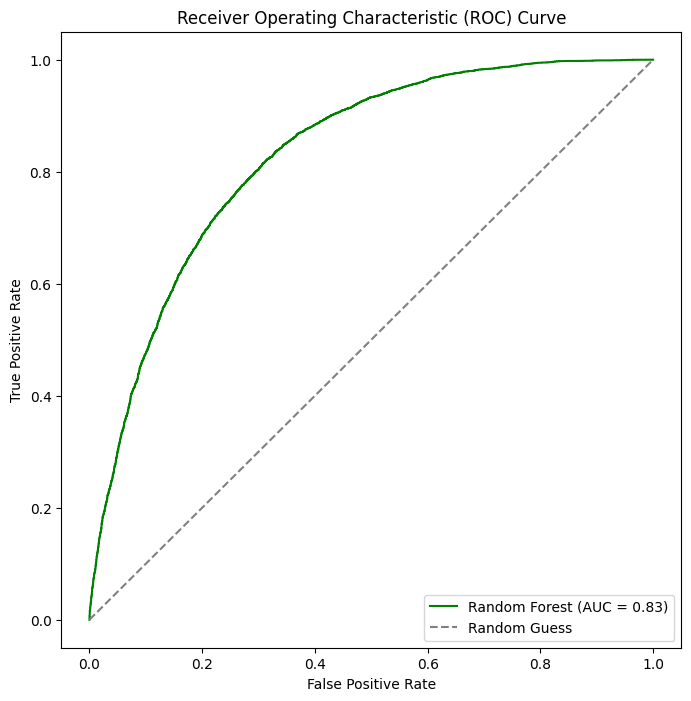

In [32]:
rfc_probs = random_forest.predict_proba(X_test)[:, 1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc_probs)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
print('auc - ' + str(roc_auc_rfc))
plt.figure(figsize=(8, 8))
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {roc_auc_rfc:.2f})', color='green')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Ainult kõrge korrelatsiooniga tunnuseid

In [45]:
# ma lihtsalt tahtsin vaadata, kas nii saab parema accuracy, aga pigem ei saanud
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split 

df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

data_small = df[['BMI', 'GenHlth',  'Age', 'Income', 'HighChol', 'HighBP','Diabetes_binary']]

X_train_small = data_small.drop(columns=['Diabetes_binary'])
y_train_small = data_small['Diabetes_binary']

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_train_small, y_train_small, test_size = 0.2, random_state = 5)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=0)
random_forest.fit(X_train_small, y_train_small)

rfc_pred = random_forest.predict(X_test_small)
print(f'RandomForestClassifier Score: {accuracy_score(y_test_small, rfc_pred)}')

RandomForestClassifier Score: 0.7463752740646439


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
from math import sqrt

logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train_small, y_train_small)

lr_pred = logistic_regression.predict(X_test_small)
print(f'LogisticRegression Score: {accuracy_score(y_test_small, lr_pred)}')


LogisticRegression Score: 0.7473654431006436
